## Heart Disease Risk Prediction

### Context

Cardiovascular diseases (CVDs) are one of the leading cause of death globally, responsible for an estimated 18 million deaths each year, according to the World Health Organization. These conditions are often influenced by modifiable risk factors such as lifestyle habits, dietary choices, and underlying mental health issues.

With timely intervention and risk assessment, many CVD-related deaths are preventable. This underscores the importance of predictive tools in modern healthcare.

This [Kaggle dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) encompasses essential information such as demographics and medical history, including a record of prior heart disease.

Our primary objective is to develop a `predictive model` capable of accurately assessing the likelihood of a new patient developing heart disease. The dataset comprises the following features:

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


## Load Dataset
**Import Libraries and read data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [ ]:
# read the csv into a DataFrame
df = pd.read_csv('heart_disease_prediction.csv')

# display first five rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploratory Data Analysis(EDA)

### EDA: Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Check for missing values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Based on the descriptive statistics:
- There are no nulls
- Mean age is ~53 years
- The minimum value for RestingBP and Cholesterol is zero which seems unlikely
- The median for cholesterol differs with the mean by 25 mm/dl indicating a possibility of outliers
- `FastingBS` and `HeartDisease` have the dtype int64, but are also categorical variables, since they only take the values `0` and `1`.

### EDA: Visualizations

Our target variable is `HeartDisease` and we want to know how the dataset is distributed in relation to it.

Let's explore the categorical features using visualizations

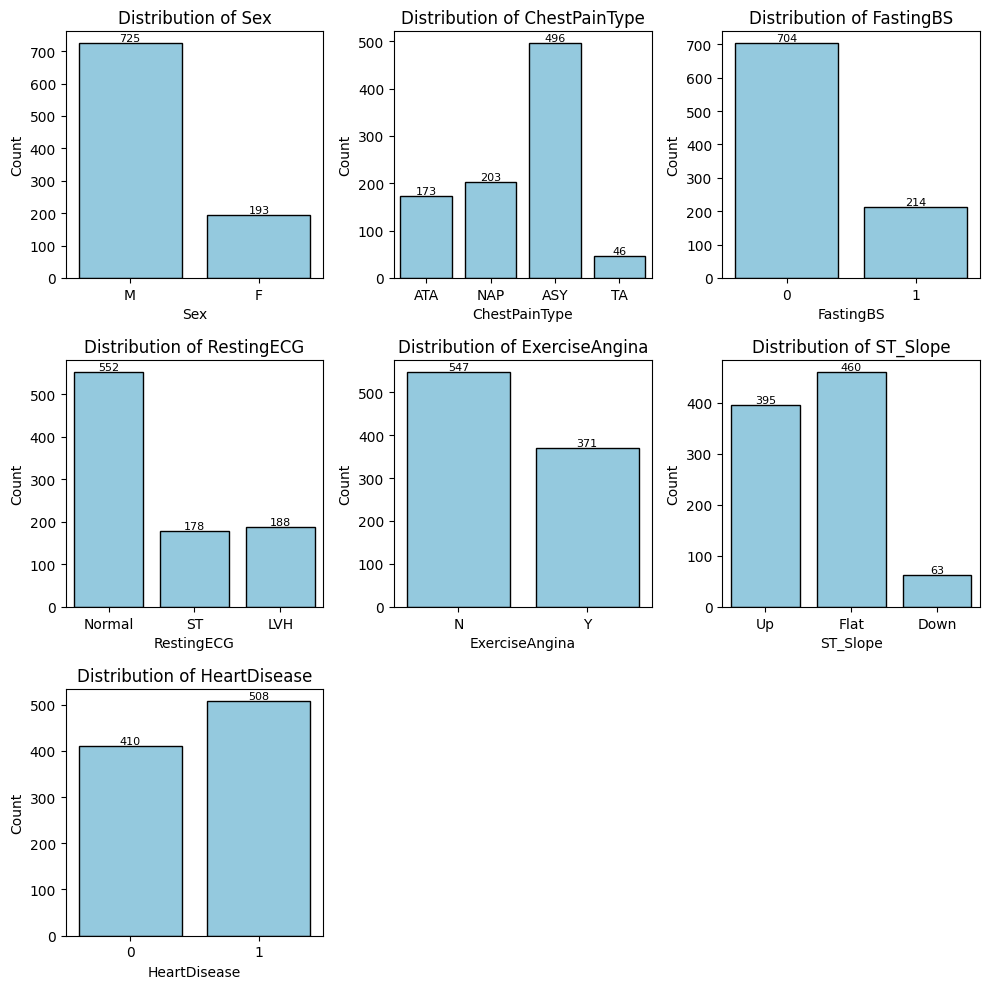

In [ ]:
# Categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG',
                       'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Layout configuration
num_plots = len(categorical_columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
axes = axes.flatten()  # Flatten 2D axes array for easy iteration

# Create count plots for each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=column, ax=ax, color='skyblue', edgecolor='k')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

    # add bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(h_pad=1.2)
plt.show()

**Insights from the plots**

- There are more male(725) patients than females(193)
- Most patients have Asymptomatic chest pain type
- Number of patients with Exercise Angina are fewer(371) as compared to those who don't have(547)
- Most patients have normal(552) resting electrocardiogram while 188 have LVH showing probable or definite left ventricular hypertrophy by Estes' criteria
- There are more patients with heart disease than without but it is fairly split

Now let us create a bar chart that displays the number of rows for each category of that column, grouped by **`HeartDisease`**

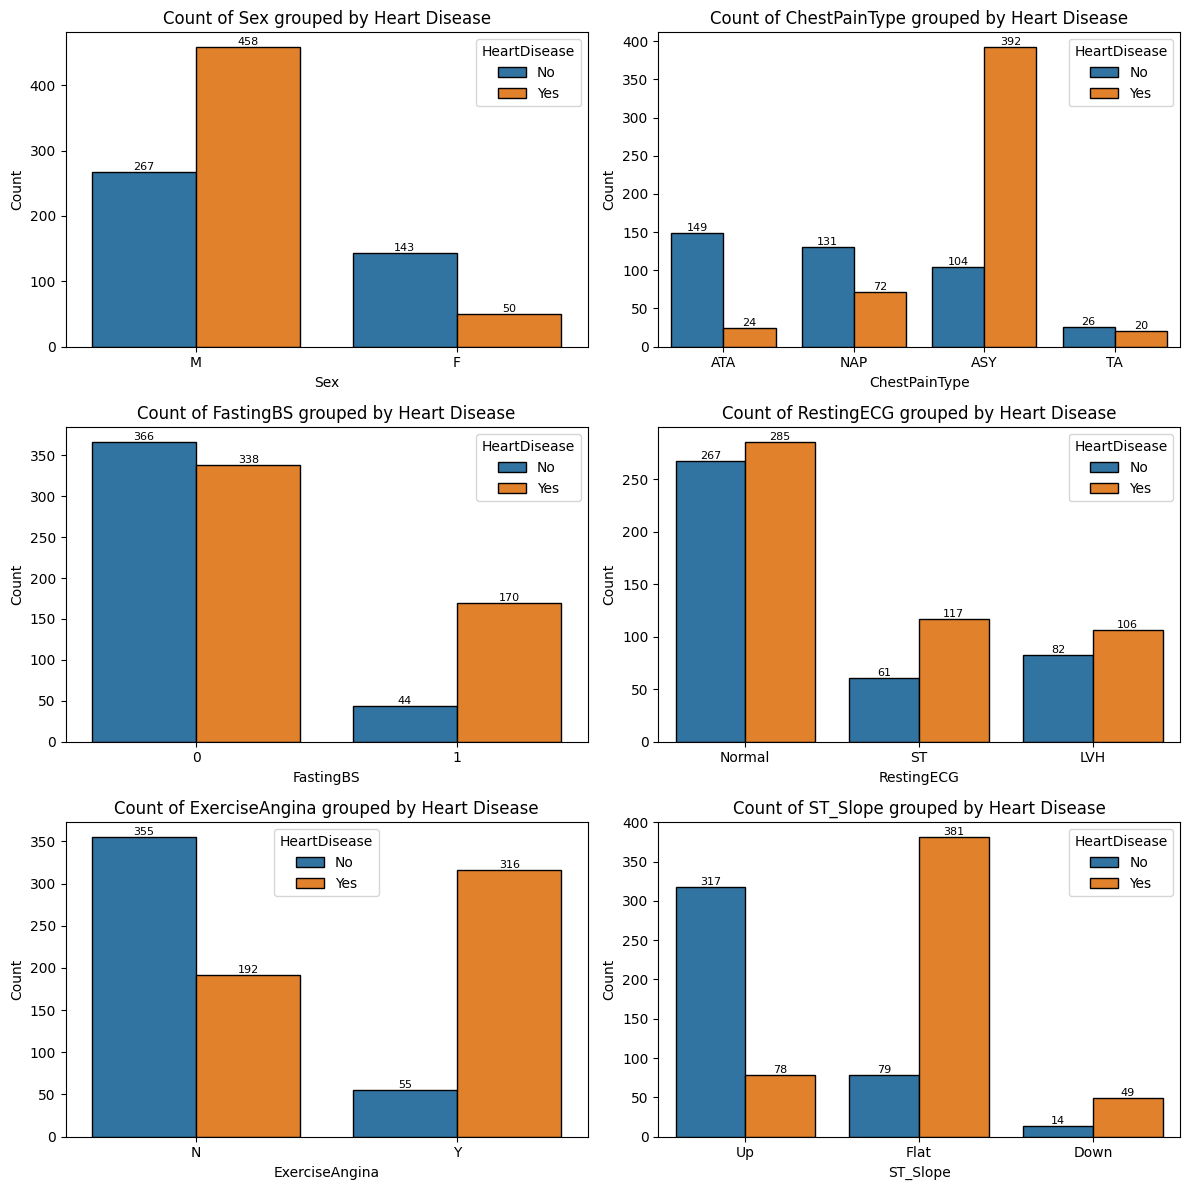

In [ ]:

# Categorical columns excluding HeartDisease
cat_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate over categorical columns and create subplots
for i, column in enumerate(cat_columns):
    sns.countplot(data=df,
                  x=column,
                  hue='HeartDisease',
                  ax=axes[i],
                  edgecolor='k')
    axes[i].set_title(f'Count of {column} grouped by Heart Disease')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='HeartDisease', labels=['No', 'Yes'])
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()

Insights from the plots:

- Heart diseases are more common among Male patients (458) than Female patients (50)
- (Asympomatic) is the most common chest pain type among heart disease patients (392), while "ATA" (Atypical Angina) is the most common among non-heart disease patients (149)
- The majority of patients, both with and without heart disease, have a normal resting electrocardiogram (ECG).
- Exercise-induced angina is more common among patients with heart disease (316) compared to those without heart disease (55).
- Flat ST slope is the most common type among patients with heart disease, while up-sloping ST segment is the most common among patients without heart disease.
- Patients with heart disease are more likely to have fasting blood sugar levels greater than 120 mg/dL compared to those without heart disease.

Let us explore more groupings and/or visualizations of the data. For example:

- What percentage of patients with heart disease are male and over 50 years old?
- What is the median age of patients who were diagnosed with heart disease?

a) **Percentage of male patients over 50 years with Heart Disease**

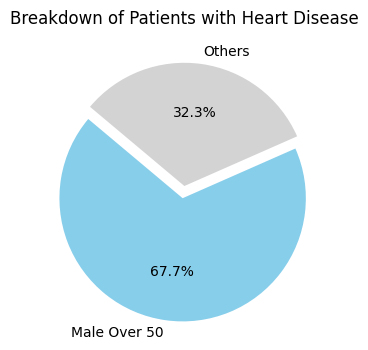

In [ ]:
# Filter data for patients with heart disease
heart_disease_patients = df[df['HeartDisease'] == 1]

# Further filter for male patients over 50 years old
male_over_50 = heart_disease_patients[(heart_disease_patients['Sex'] == 'M') & (heart_disease_patients['Age'] > 50)]

# Calculate percentage
total_heart_disease = len(heart_disease_patients)
male_over_50_count = len(male_over_50)
percentage_male_over_50 = (male_over_50_count / total_heart_disease) * 100

# Visualize the breakdown
labels = ['Male Over 50', 'Others']
sizes = [male_over_50_count, total_heart_disease - male_over_50_count]
colors = ['skyblue', 'lightgrey']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title('Breakdown of Patients with Heart Disease')
plt.show()


This graph shows that of all heart disease patients 67.7% of males over 50 years have heart disease. This may be an indicator that males above 50 years are at a higher risk.

b) **Median age of patients diagnosed with heart disease**

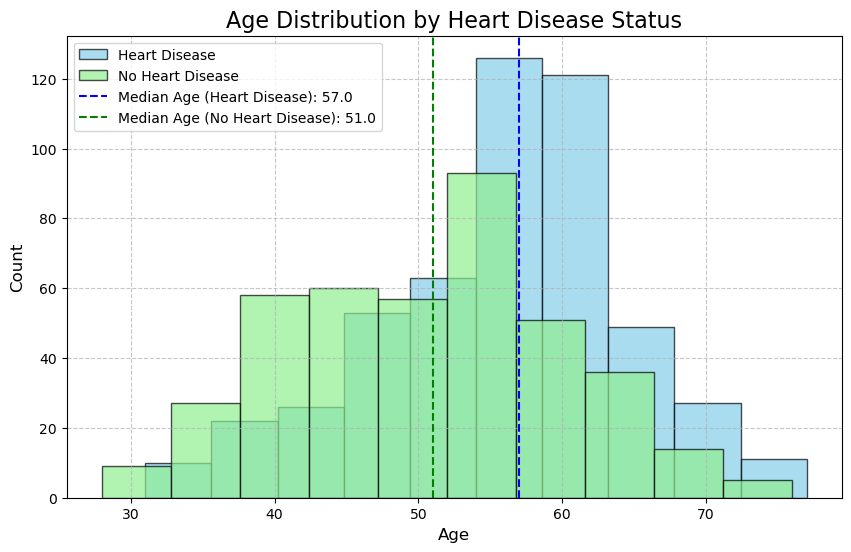

In [ ]:
# Filter data for patients with and without heart disease
heart_disease_patients = df[df['HeartDisease'] == 1]
no_heart_disease_patients = df[df['HeartDisease'] == 0]

# Calculate the median age for both groups
median_age_hd = heart_disease_patients['Age'].median()
median_age_no_hd = no_heart_disease_patients['Age'].median()

# Plot age distribution for both groups
plt.figure(figsize=(10, 6))
plt.hist(heart_disease_patients['Age'], bins=10, color='skyblue', alpha=0.7, edgecolor='black', label='Heart Disease')
plt.hist(no_heart_disease_patients['Age'], bins=10, color='lightgreen', alpha=0.7, edgecolor='black', label='No Heart Disease')

# Add vertical lines for medians
plt.axvline(median_age_hd, color='blue', linestyle='--', label=f'Median Age (Heart Disease): {median_age_hd:.1f}')
plt.axvline(median_age_no_hd, color='green', linestyle='--', label=f'Median Age (No Heart Disease): {median_age_no_hd:.1f}')

# Add labels, title, and legend
plt.title('Age Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


The median age for those with heart disease(57) is higher than those without(51). This suggests that age may be a risk factor.

However there is overlapping in the age distributions suggesting that age might not be the only factor contributing to heart disease

## Data Cleaning

We identified that there are no missing values in our dataset. However, as we noticed earlier, a couple of columns have 0 values that don't make sense.

There are a few ways we can handle these values:

- We could remove those rows entirely if their frequency of occurrence is low.
- We could impute those zeros with the median value of that column or the median value of the column grouped by `HeartDisease`.
- We could try some complex approaches. For example, instead of using the median of the entire column, maybe we could look at the median of the values grouped by the age, sex, and/or resting ECG of the patient. The resting blood pressure of a female in her 30s with a normal ECG might be lower than what we would get from the median of the entire column.

1. Count the number of rows that have a `0` value for `RestingBP`.

In [ ]:
zero_bp = (df['RestingBP']==0).sum()
print("Number of rows with 0 RestingBP is", zero_bp )

Number of rows with 0 RestingBP is 1


2. Count the number of rows that have a `0` value for `Cholesterol`.

In [ ]:
zero_chol = (df['Cholesterol']==0).sum()
print("Number of rows with zero Cholesterol is", zero_chol)

Number of rows with zero Cholesterol is 172


The dataset has 918 entries and so dropping 172 rows will reduce the size significantly.

Let's replace those values with the median value of the corresponding column and the corresponding `HeartDisease` value.

In [ ]:
df_clean = df.copy()

# remove the 1 row where RestingBP is zero
df_clean = df_clean[df_clean['RestingBP'] != 0]

# separate Cholesterol columns based on heart disease
heartdisease_mask = df_clean['HeartDisease'] == 0

chol_hd = df_clean.loc[heartdisease_mask, 'Cholesterol']
chol_no_hd = df_clean.loc[~heartdisease_mask, 'Cholesterol']

# Impute 0 values in Cholesterol with median of the corresponding mask
df_clean.loc[heartdisease_mask, 'Cholesterol'] = chol_hd.replace(0, chol_hd.median())
df_clean.loc[~heartdisease_mask, 'Cholesterol'] = chol_no_hd.replace(0, chol_no_hd.median())

df_clean[['RestingBP', 'Cholesterol']].describe()

,RestingBP,Cholesterol
count,917.000000,917.000000
mean,132.540894,239.700109
std,17.999749,54.352727
min,80.000000,85.000000
25%,120.000000,214.000000
50%,130.000000,225.000000
75%,140.000000,267.000000
max,200.000000,603.000000


Now the minimum values in both columns have been updated

## Feature Selection

Now that we've cleaned our data, we can select features for our model. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

- Age
- Sex
- ChestPainType
- Cholesterol
- FastingBS

Please note: The above list of features is not exhaustive. You're encouraged to select different features for your model. If you do, make sure to provide reasoning for selecting those features.

We'll also explore how the columns correlate to one another. Before we attempt that, we'll convert our categorical columns into dummy variables.

In [ ]:
# Convert the categorical features into dummy variables.
df_encoded = pd.get_dummies(df_clean, drop_first=True)

df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


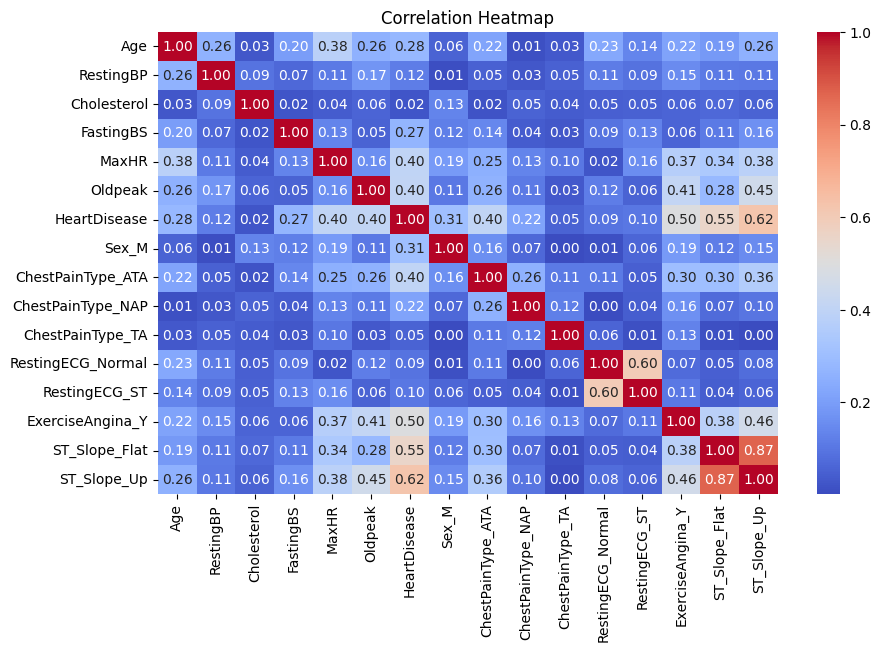

In [ ]:
# Create a correlation heat map.
corr_matrix = abs(df_encoded.corr())

# Plot the corr matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",)
plt.title("Correlation Heatmap")
plt.show()

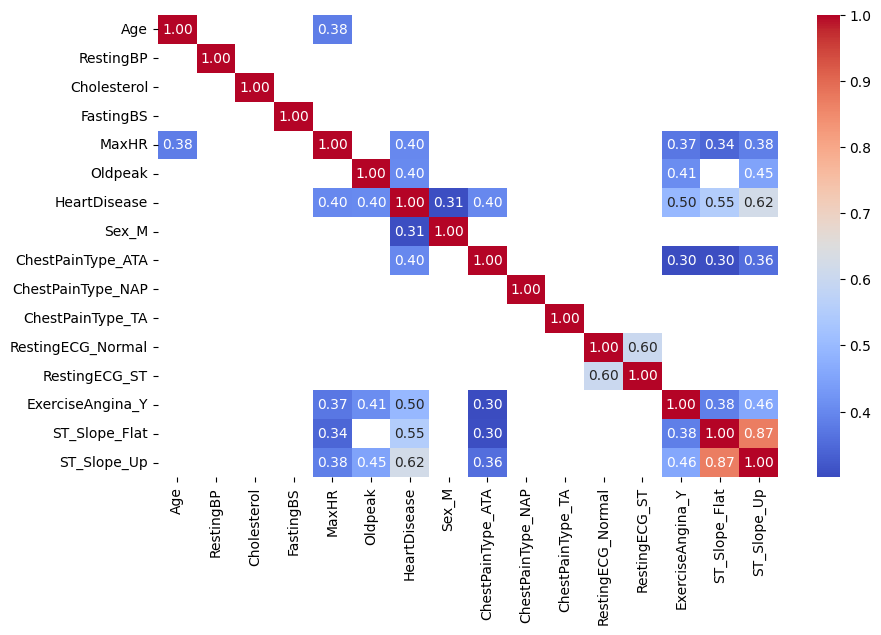

In [ ]:
# Limit what will show based on a threshold 0f 0.3
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[corr_matrix > 0.3], annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:

# Identify significant correlations with HeartDisease
from scipy.stats import pearsonr

threshold = 0.3  # Adjust threshold as needed
significant_corr = {}

for column in df_encoded.columns:
    if column != 'HeartDisease':
        r_value, p_value = pearsonr(df_encoded[column], df_encoded['HeartDisease'])
        if abs(r_value) > threshold:  # Select features based on the threshold
            significant_corr[column] = r_value

# Print significant correlations
print("Features significantly correlated with HeartDisease:")
for feature, corr in significant_corr.items():
    print(f"{feature}: {corr:.2f}")

Features significantly correlated with HeartDisease:
MaxHR: -0.40
Oldpeak: 0.40
Sex_M: 0.31
ChestPainType_ATA: -0.40
ExerciseAngina_Y: 0.49
ST_Slope_Flat: 0.55
ST_Slope_Up: -0.62


These are the features we will narrow down to.

## Building a Classifier with one feature

In [ ]:
# Split into features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=417)

features = [
    'MaxHR',
    'Oldpeak',
    'Sex_M',
    'ExerciseAngina_Y',
    'ST_Slope_Flat',
    'ST_Slope_Up'
]

# Train a k-NN clasifier
for feature in features:
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(X_train[[feature]], y_train)
  accuracy = knn.score(X_val[[feature]], y_val)
  print(f"The k-NN classifier trained on {feature} and with k=3 has an accuracy of {accuracy*100:.2f}%")

The k-NN classifier trained on MaxHR and with k=3 has an accuracy of 66.67%
The k-NN classifier trained on Oldpeak and with k=3 has an accuracy of 76.81%
The k-NN classifier trained on Sex_M and with k=3 has an accuracy of 44.93%
The k-NN classifier trained on ExerciseAngina_Y and with k=3 has an accuracy of 73.19%
The k-NN classifier trained on ST_Slope_Flat and with k=3 has an accuracy of 81.88%
The k-NN classifier trained on ST_Slope_Up and with k=3 has an accuracy of 84.06%


`ST_Slope_Up` produces our best perfoming model with an accuracy of 84% followed closely by `ST_Slope_Flat` (~82%). This is a bit consistent with our distributions before.

Let's work with multiple features to improve our model

## Building a Classifier with Multiple Features

In [ ]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 83.33%


There isn't much improvement on the accuracy.

Let's tune the parameters and see which ones are significant

### Hyperparameter Tuning

In [ ]:
# Define features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=417)

features = [
    'MaxHR',
    'Oldpeak',
    #'Sex_M', # testing to see whether its a factor
    'ExerciseAngina_Y',
    'ST_Slope_Flat',
    'ST_Slope_Up'
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

# search for optimal parameters
grid_params = {"n_neighbors": range(1, 20),
               "metric": ["manhattan", "minkowski"]
               }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train);

In [ ]:
knn_grid.best_score_*100, knn_grid.best_params_

(np.float64(82.79569892473117), {'metric': 'manhattan', 'n_neighbors': 19})

In [ ]:
# Test the model with the test data
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on test set: {accuracy*100:.2f}%")

Model Accuracy on test set: 82.61%


The model performs well on both training and testing data.

When `Sex_M` is included as a feature the training accuracy is a bit higher showing that it might be overfitting but not as much.

However none of the models achieve the accuracy of the one feature model.

Let's check the confusion matrix to know which values were correctly predicted and compare the false positives and false negatives

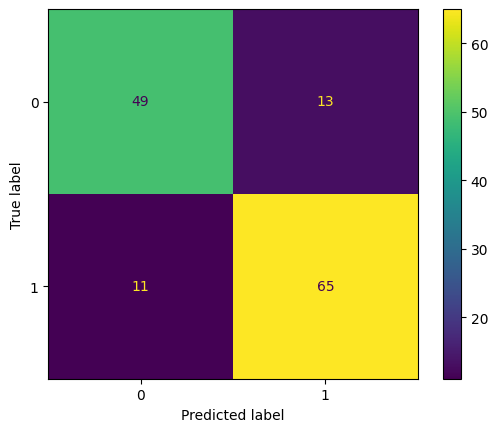

In [ ]:
cf = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cf).plot()
plt.show()

11 patients were predicted to have no heart disease yet they had it. This can be detrimental healthwise.

13 were predicted to have heart disease yet they did not have. This can cause stress but it does not have great impact on their health

## Next Steps
- Explore with different features to train the model (even using all the features)
- Experiment with different parameters and hyperparameters(e.g a different random_state)
- Explore whether the gender imbalance can be addressed
- Experiment with other algorithms